In [172]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [173]:
dc_df = pd.read_csv("DC_Properties.csv")
dc_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [174]:
dc_df.dropna(subset=['ROOMS','BEDRM','BATHRM','HF_BATHRM','FIREPLACES','EYB','PRICE','LANDAREA','NUM_UNITS','YR_RMDL','GBA','KITCHENS'], inplace=True)

In [175]:
dc_df["STATE"].fillna("DC", inplace=True)
dc_df["CITY"].fillna("Washington", inplace=True)
dc_df["QUADRANT"].fillna("DC1", inplace=True)
dc_df["FULLADDRESS"].fillna("DC1", inplace=True)
dc_df["AYB"].fillna(dc_df["AYB"].mean(), inplace=True)
dc_df["LIVING_GBA"].fillna("15", inplace=True)
dc_df["CMPLX_NUM"].fillna("1", inplace=True)
dc_df["STORIES"].fillna(dc_df["STORIES"].mean(), inplace=True)
dc_df["ASSESSMENT_SUBNBHD"].fillna("DC1", inplace=True)
dc_df["CENSUS_BLOCK"].fillna("2000-2006", inplace=True)
dc_df["X"].fillna(dc_df["X"].mean(), inplace=True)
dc_df["Y"].fillna(dc_df["Y"].mean(), inplace=True)
dc_df["NATIONALGRID"].fillna("18S UJ 27939 07886", inplace=True)

In [176]:
print(dc_df.isnull().sum())

Unnamed: 0            0
BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
CMPLX_NUM             0
LIVING_GBA            0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNB

In [177]:
len(dc_df)

33217

In [178]:
dc_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,...,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000,33217.000000
mean,45489.073366,2.376614,0.682693,1.239727,7.578409,3.527862,1924.163140,2004.257188,1969.381341,2.157724,...,1.283228,0.759370,13.583406,3158.990186,20010.264533,38.916772,-77.014532,5215.999669,-77.014567,38.916729
std,30233.840436,1.057769,0.597733,0.613896,2.331884,1.168727,22.166792,16.644758,10.523992,5.194458,...,0.673154,0.986781,4.520530,3288.877032,7.511268,0.031308,0.041566,3414.827476,0.041529,0.031248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,...,0.000000,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,18326.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1910.000000,2002.000000,1964.000000,2.000000,...,1.000000,0.000000,11.000000,1471.000000,20003.000000,38.894629,-77.041932,1901.000000,-77.042118,38.894569
50%,41584.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1924.163140,2008.000000,1967.000000,2.000000,...,1.000000,1.000000,12.000000,2090.000000,20010.000000,38.914714,-77.011864,5201.000000,-77.011517,38.914927
75%,70798.000000,3.000000,1.000000,1.000000,9.000000,4.000000,1939.000000,2013.000000,1972.000000,2.000000,...,1.000000,1.000000,13.000000,3988.000000,20016.000000,38.939201,-76.987229,8200.000000,-76.987055,38.939045
max,106695.000000,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2019.000000,2017.000000,826.000000,...,44.000000,13.000000,39.000000,155905.000000,20052.000000,38.994894,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000026ECB8CCC8>,
      dtype=object)

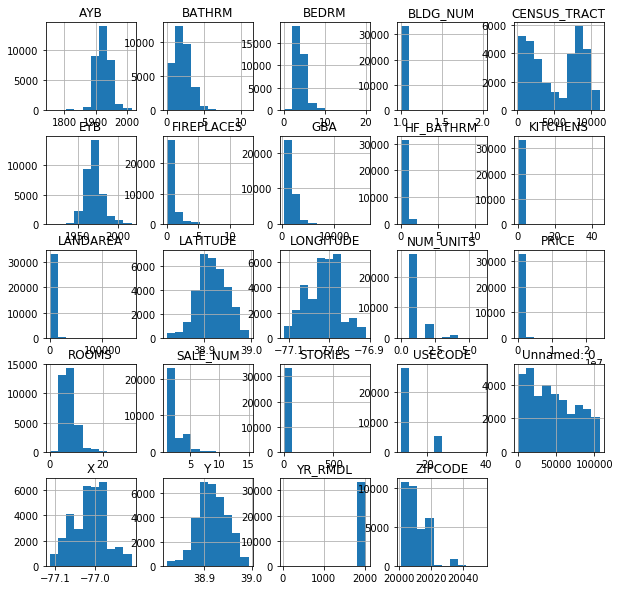

In [179]:
dc_df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000026DB8EB448>,
      dtype=object)

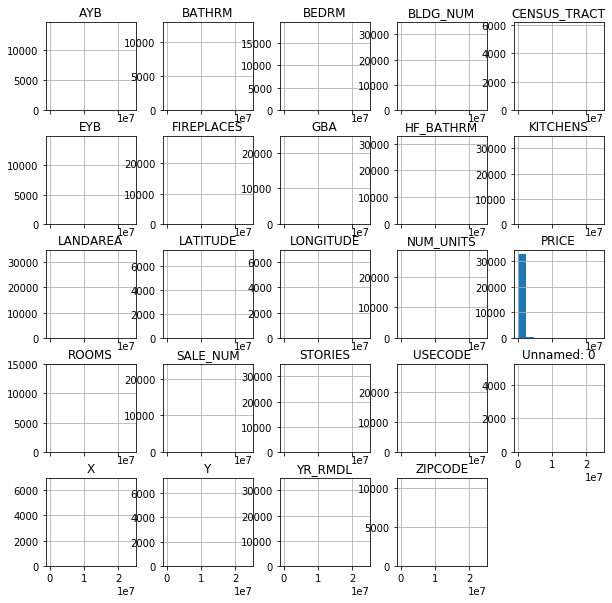

In [180]:
dc_df.hist(figsize=(10,10), sharex=True)

In [181]:
dc_df['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
7    1050000.0
8    1430000.0
Name: PRICE, dtype: float64

z-score standardization only for price column

In [182]:
scaler = StandardScaler()

In [183]:
price_zscore = scaler.fit_transform(dc_df[['PRICE']])
price_zscore

array([[ 0.63498656],
       [ 2.19242196],
       [ 1.42067785],
       ...,
       [-0.77522857],
       [-0.72873796],
       [-0.84496449]])

In [184]:
price_zscore.mean(), price_zscore.std()

(-9.069757050976382e-17, 1.0)

In [185]:
pr_z_col = pd.Series(price_zscore.reshape(-1))
pr_z_col.head()

0    0.634987
1    2.192422
2    1.420678
3    0.565251
4    1.154132
dtype: float64

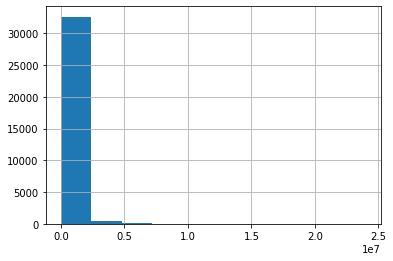

In [186]:
dc_df['PRICE'].hist()

Min-max scaling for price column

In [187]:
minmax_sc = MinMaxScaler()

In [188]:
price_minmax = minmax_sc.fit_transform(dc_df[['PRICE']])

In [189]:
price_minmax.mean(), price_minmax.std()

(0.028599303734693552, 0.026931715807175894)

In [190]:
pr_mm_col = pd.Series(price_minmax.reshape(-1))
pr_mm_col.head()

0    0.045701
1    0.087645
2    0.066861
3    0.043822
4    0.059682
dtype: float64

In [191]:
pr_mm_col.min(), pr_mm_col.max()

(0.0, 1.0)

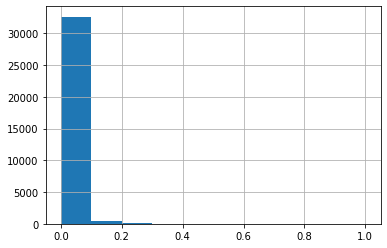

In [192]:
pr_mm_col.hist()